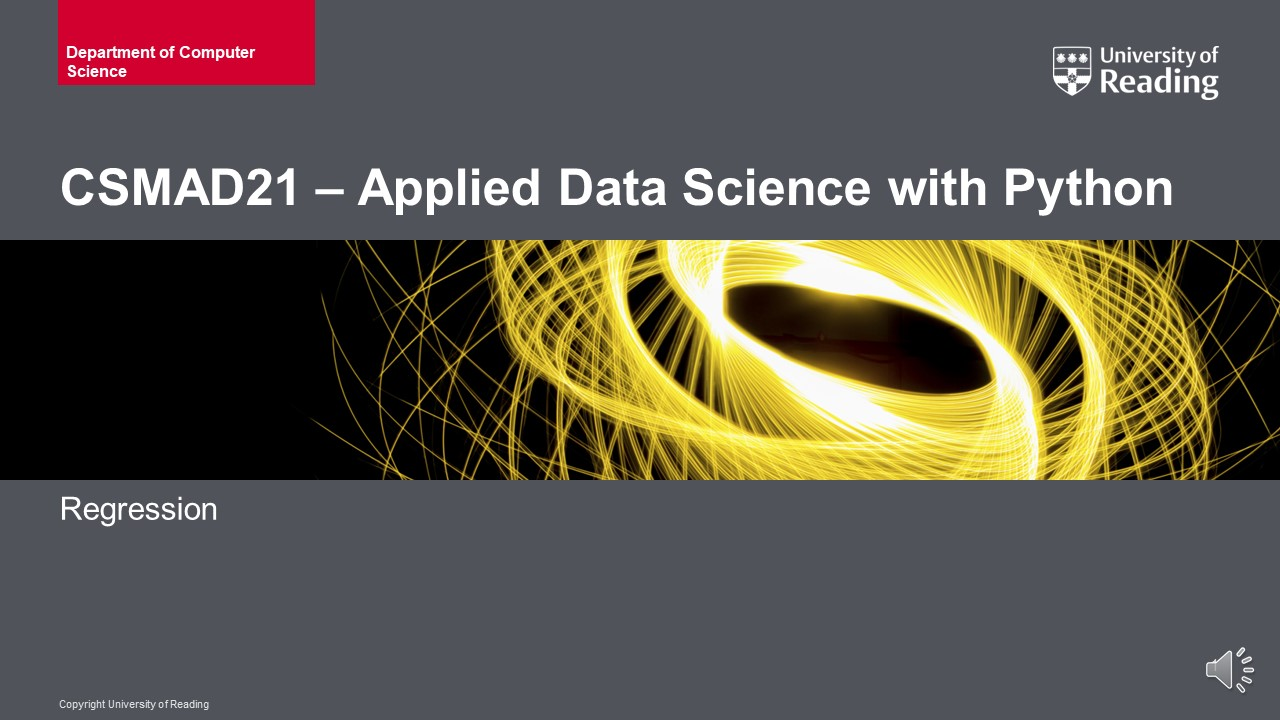

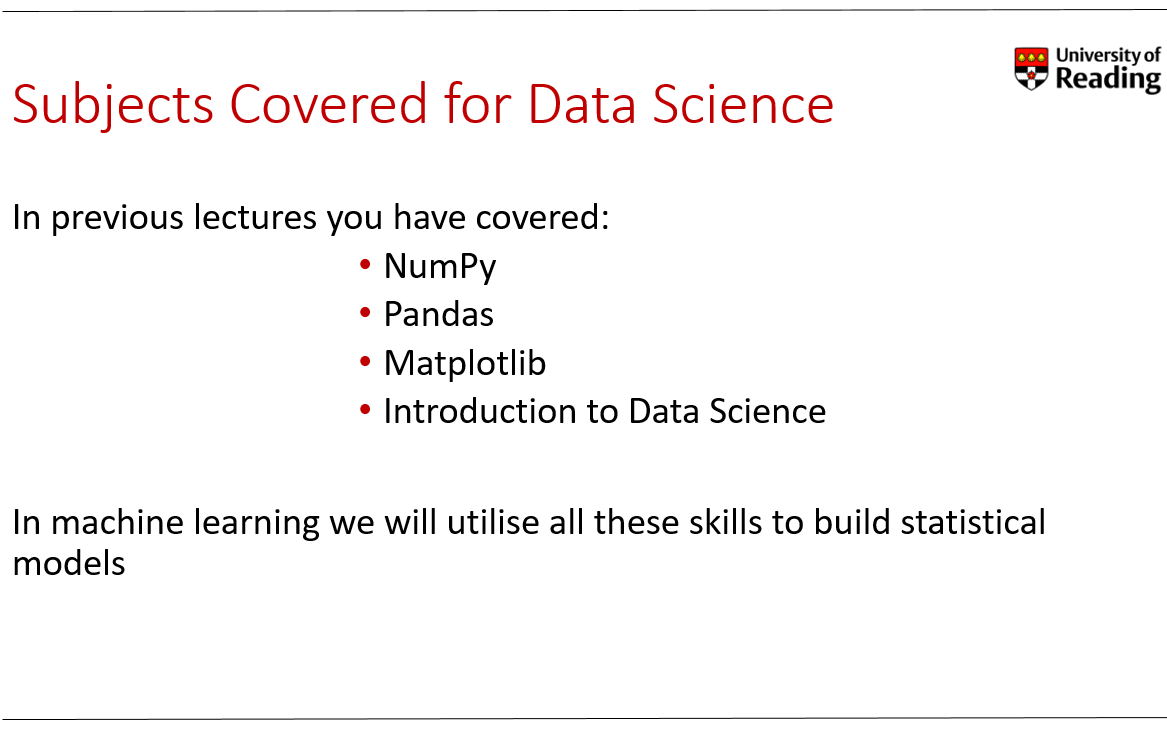

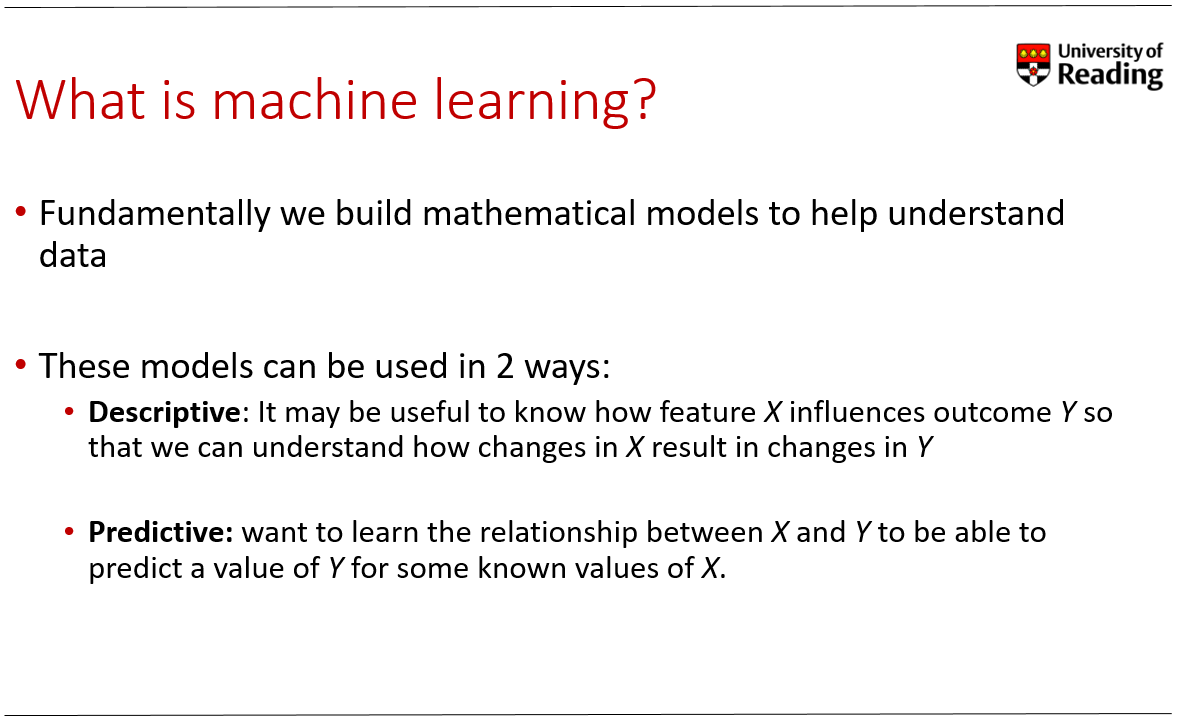

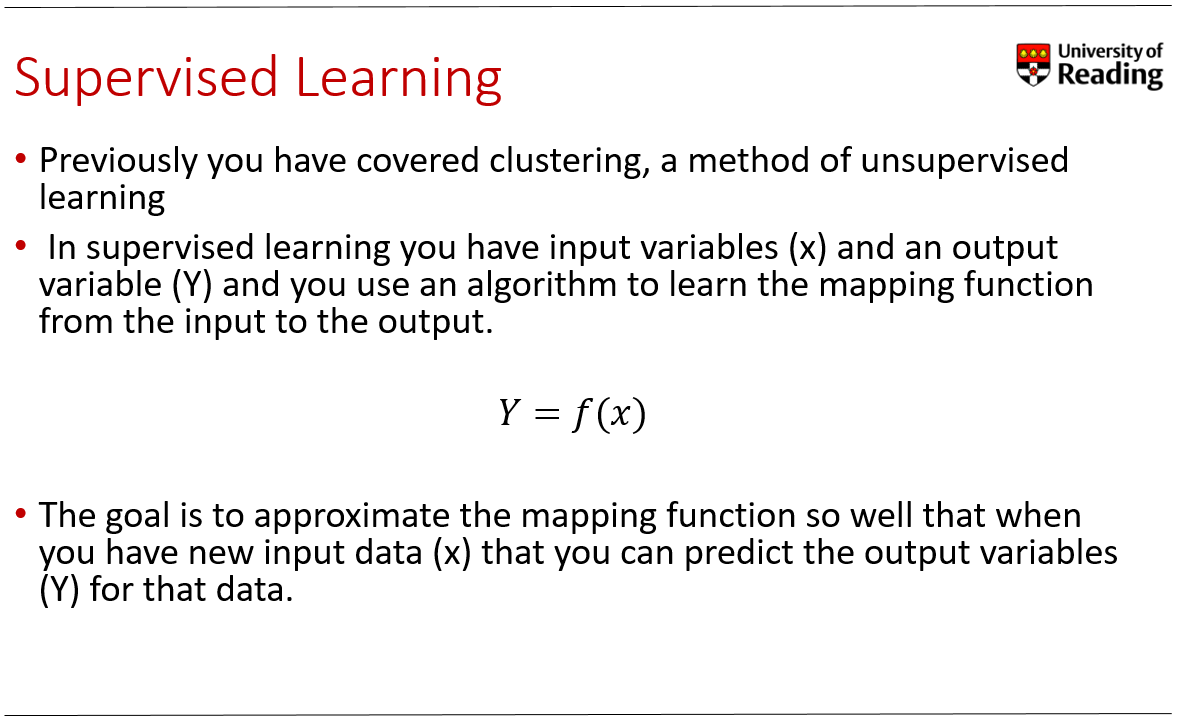

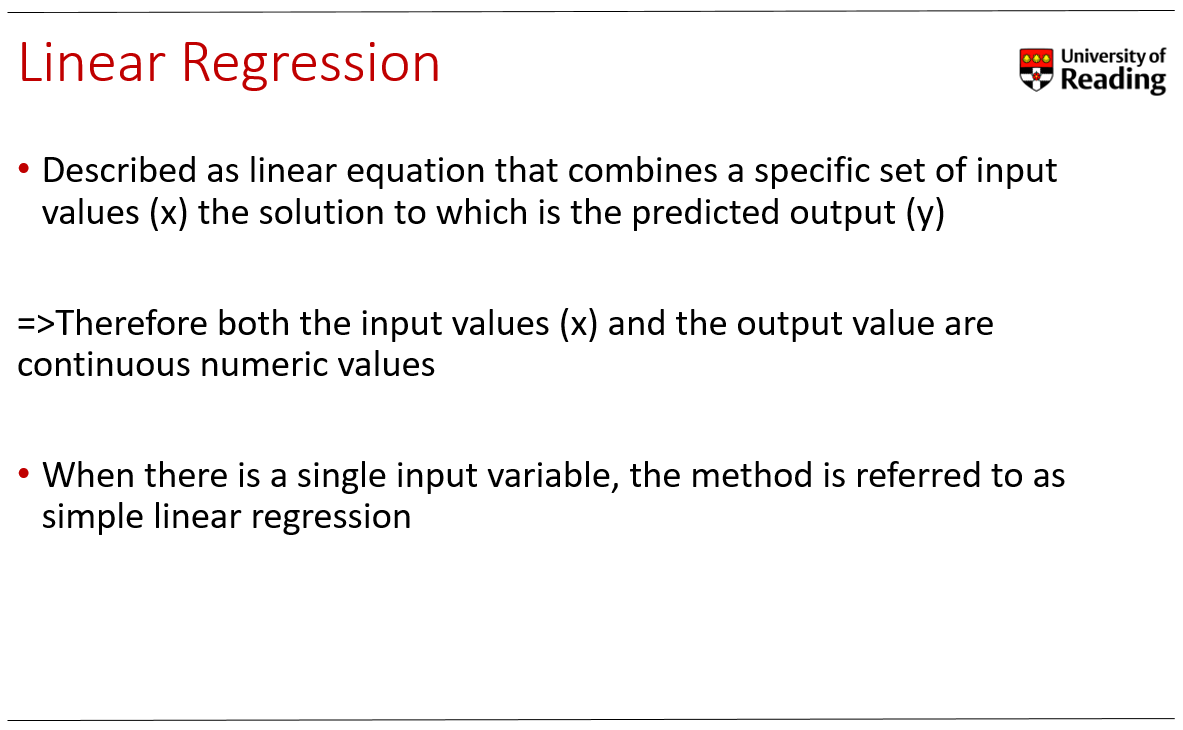

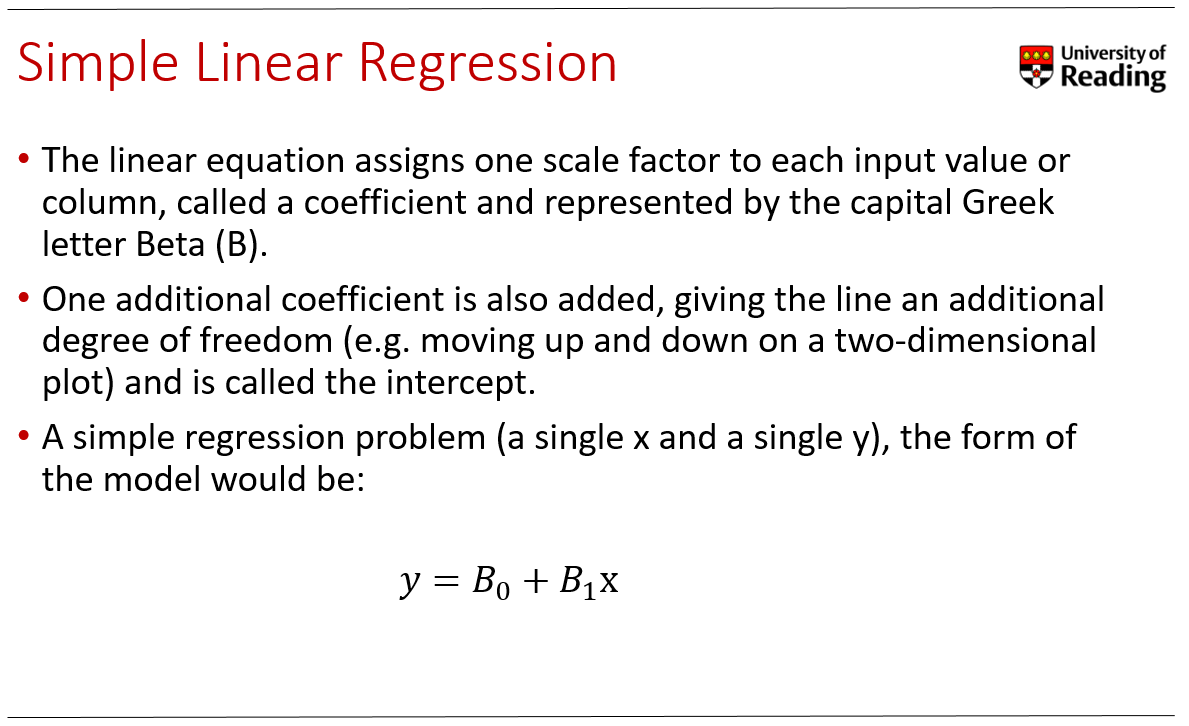

More often than not you will be able to use the scikit learn API to implement linear regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

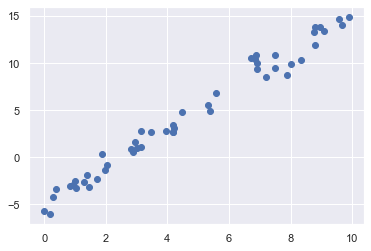

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

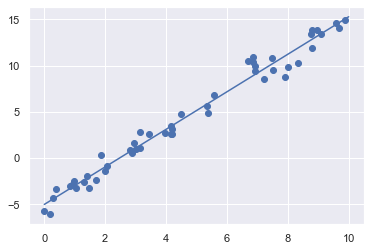

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);



In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


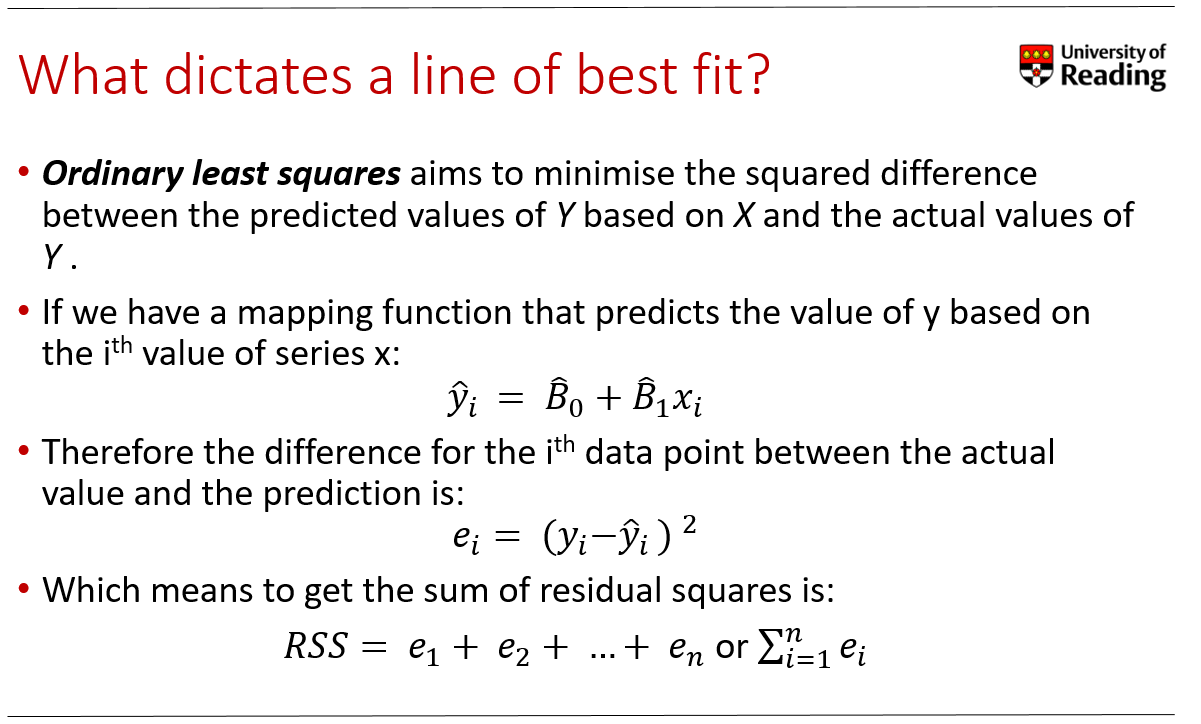

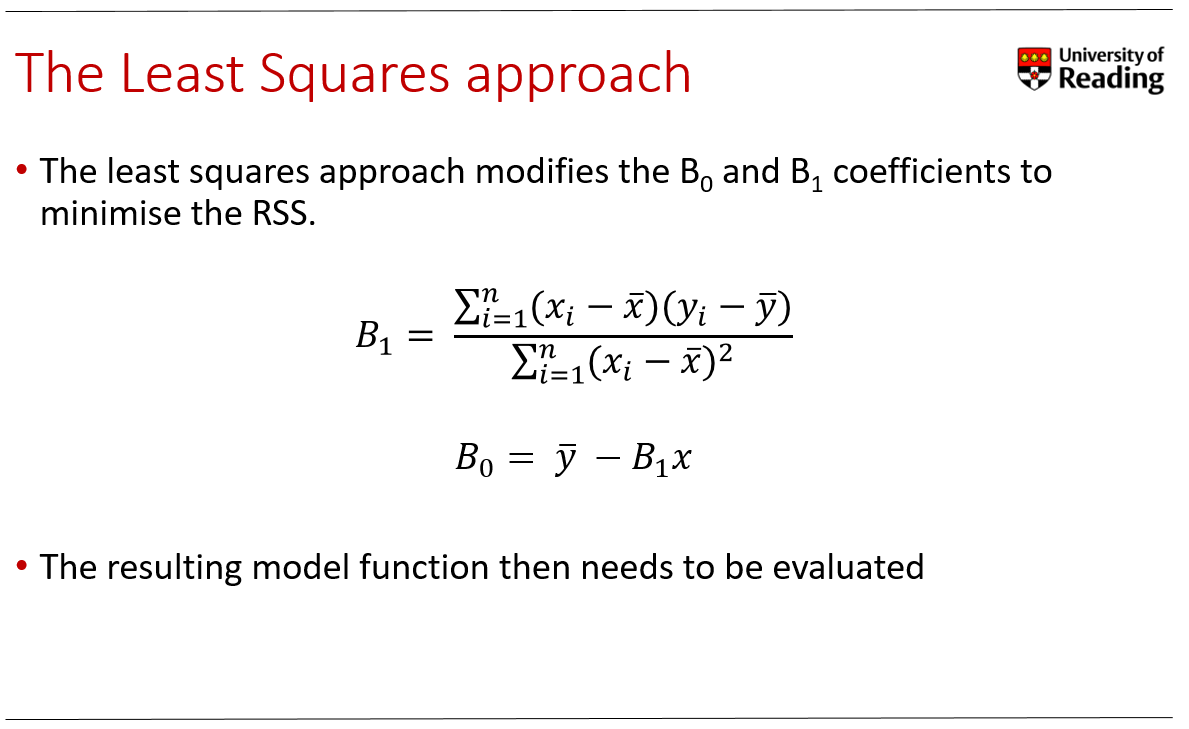

# An example of simple linear regression

Utilising skills learned with panda and seaborn a simple regression and visualisation can be made with very little code

In [6]:
#reading data 
dataset = pd.read_csv('headbrain.csv')
print(dataset.shape)
dataset.head()

(237, 4)


Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590

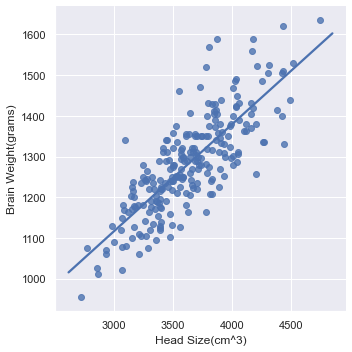

In [7]:
# Use integrated Seaborn function for single lenear regression
sns.lmplot(x='Head Size(cm^3)',y='Brain Weight(grams)',data=dataset,ci=None)

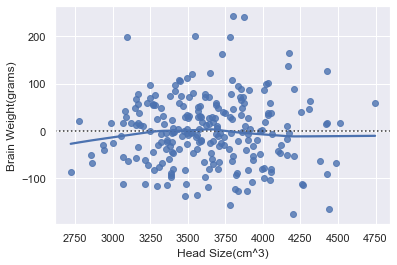

In [8]:
#Plot the residuals for the single linear regression fit
sns.residplot(x='Head Size(cm^3)',y='Brain Weight(grams)',data=dataset, lowess=True, color="b")

In [10]:
#Plot a regression model using scikit learn
X = dataset.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dataset.iloc[:, -1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
print('Intercept: \n',linear_regressor.intercept_)

Coefficients: 
 [[0.26342934]]
Intercept: 
 [325.57342105]


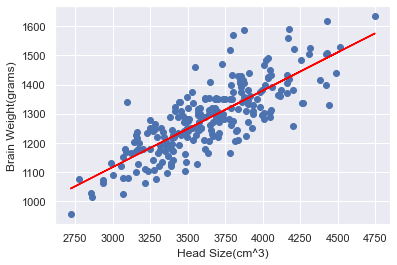

In [11]:
# Plot outputs
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()

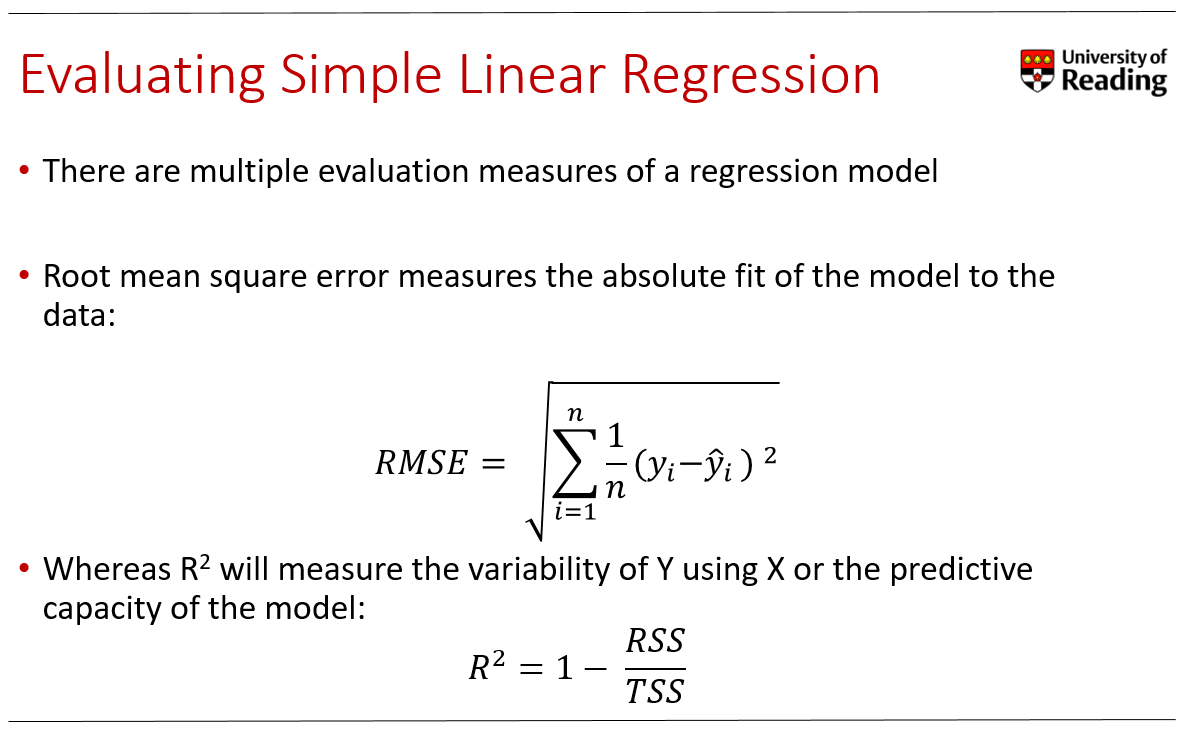

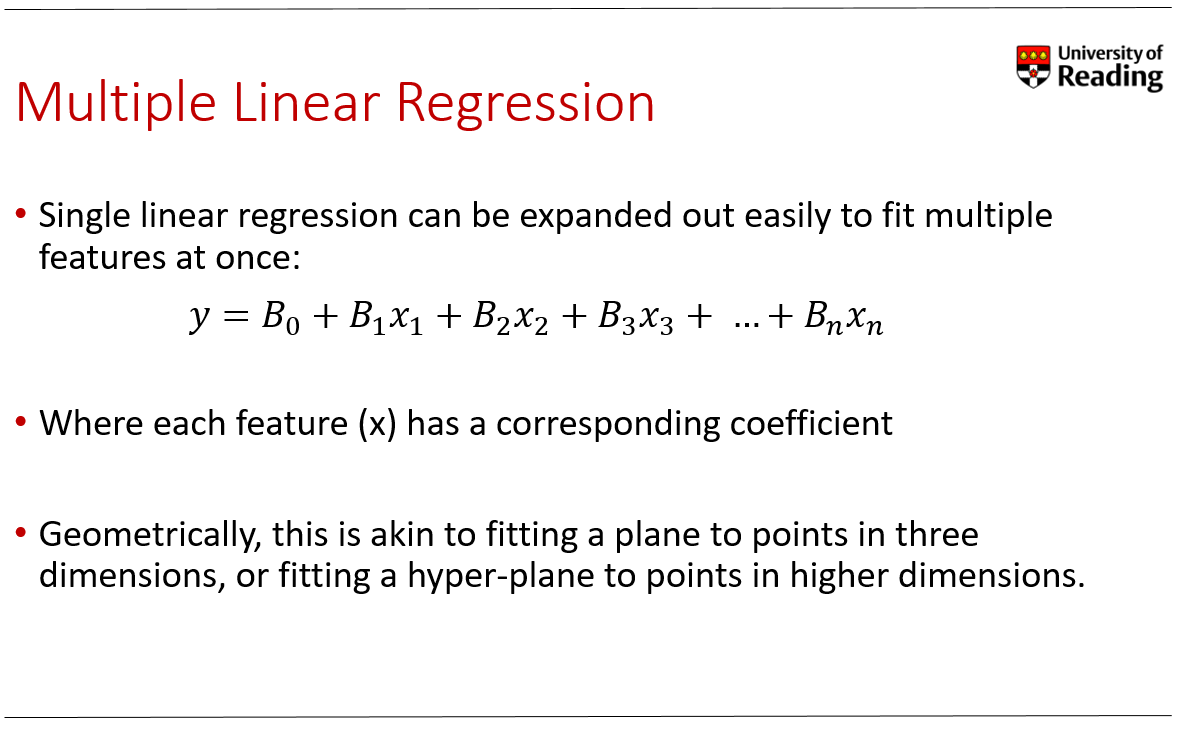

# An example of multiple linear regression and use of Evaluation statistics

In this example we use multiple linear regression to build a model based on a real dataset. We use the data science methodology to build a fit and establish whether the model is an effective predictor of trends in the data

In [12]:
# Another way of getting datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
diabetes = datasets.load_diabetes()

In [13]:
diabetes.data.shape

(442, 10)

In [14]:
diabetes.target.shape

(442,)

In [15]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [17]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.45260660216173787

In [18]:
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 2900.17
Root Mean squared error: 53.85
Coefficient of determination: 0.45


In [19]:
model.coef_

array([  37.90031426, -241.96624835,  542.42575342,  347.70830529,
       -931.46126093,  518.04405547,  163.40353476,  275.31003837,
        736.18909839,   48.67112488])

In [20]:
model.intercept_

151.3456553477407

In [21]:
model.predict(X_test)

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

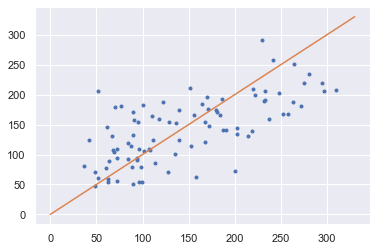

In [22]:
#Multiple dimensional data is difficult to visualise
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

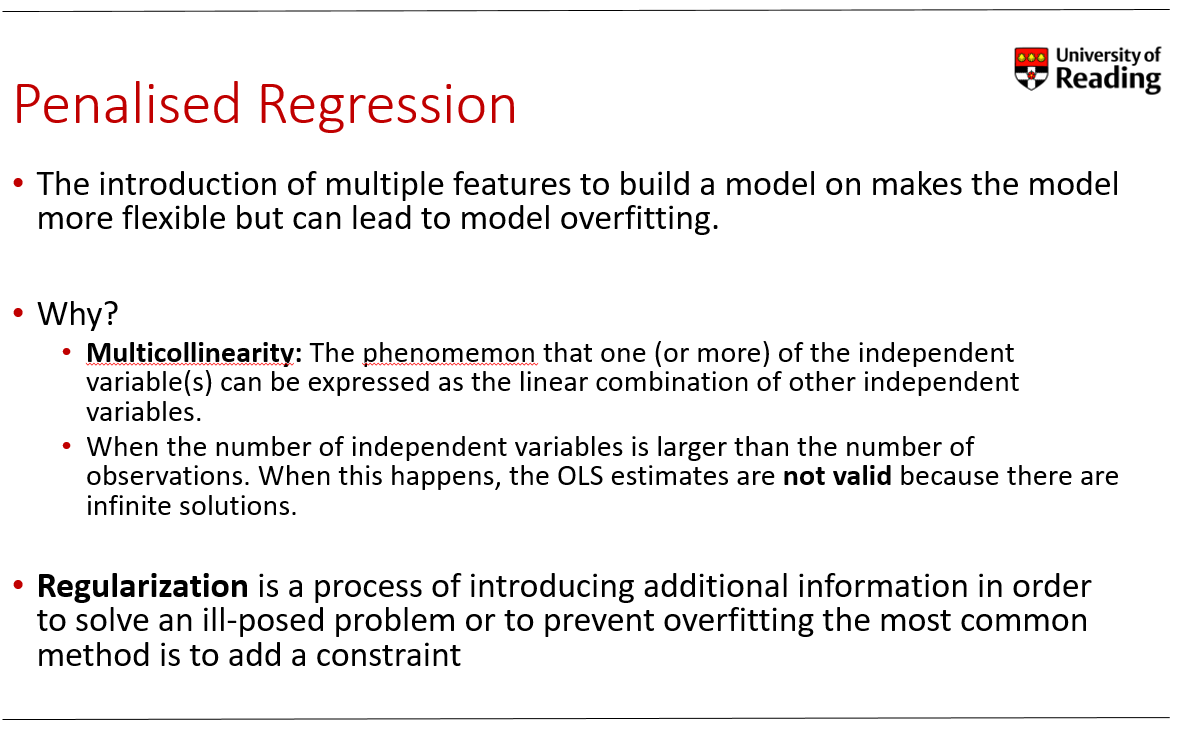

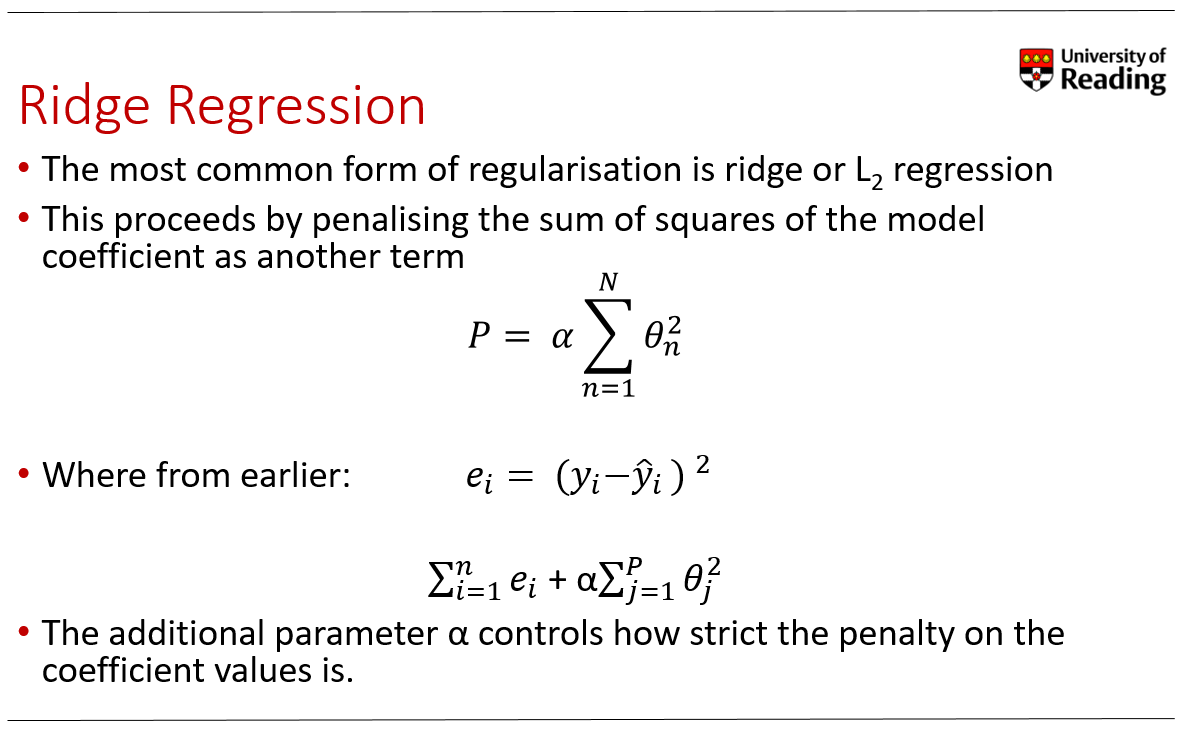

# An example of penalised ridge regression

In [52]:
#Using an integrated sklearn dataset
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

In [53]:
boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y = boston["target"]
names = boston["feature_names"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
# 1. Set up the model
ridge = Ridge(alpha=0.1)
# 2. Use fit
ridge.fit(X_train, y_train)
# 3. Check the score
ridge.score(X_test, y_test)

0.6687275433090567

In [67]:
y_pred = ridge.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 24.29
Root Mean squared error: 4.93
Coefficient of determination: 0.67


In [68]:
ridge.coef_

array([-0.97052404,  0.69960005,  0.27406007,  0.70692538, -1.9883985 ,
        3.11640735, -0.1772076 , -3.04214761,  2.27442714, -1.78483752,
       -1.97902616,  1.12626177, -3.62679724])

In [70]:
def ridge_alpha(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        ridge = Ridge(alpha=alpha)
        
        # Fit the lasso regression
        ridge.fit(X_train, y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the datafram    
    return df

In [71]:
ridge_alpha([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20])

Feature Name  Alpha = 0.000000  Alpha = 0.000100  Alpha = 0.001000  \
0          CRIM         -0.971494         -0.971493         -0.971485   
1            ZN          0.701556          0.701554          0.701536   
2         INDUS          0.276752          0.276749          0.276725   
3          CHAS          0.706532          0.706532          0.706535   
4           NOX         -1.991430         -1.991427         -1.991400   
5            RM          3.115718          3.115719          3.115725   
6           AGE         -0.177060         -0.177060         -0.177062   
7           DIS         -3.045771         -3.045767         -3.045734   
8           RAD          2.282785          2.282776          2.282701   
9           TAX         -1.792605         -1.792597         -1.792527   
10      PTRATIO         -1.979954         -1.979953         -1.979944   
11            B          1.126499          1.126498          1.126496   
12        LSTAT         -3.628149         -3.628148         -3.628136   

    Alpha = 0.010000  Alpha = 1.000000  Alpha = 5.000000  Alpha = 10.000000  \
0          -0.971397         -0.962034         -0.928802          -0.895069   
1           0.701359          0.682559          0.617167           0.553165   
2           0.276482          0.250716          0.163048           0.080063   
3           0.706571          0.710338          0.723095           0.735054   
4          -1.991127         -1.961573         -1.851530          -1.731819   
5           3.115788          3.122321          3.143227           3.159946   
6          -0.177075         -0.178459         -0.182664          -0.185753   
7          -3.045408         -3.010025         -2.876908          -2.729280   
8           2.281946          2.201956          1.929837           1.672396   
9          -1.791825         -1.717846         -1.472739          -1.252253   
10         -1.979861         -1.970825         -1.937151          -1.900160   
11          1.126475          1.124140          1.114892           1.103629   
12         -3.628014         -3.614787         -3.564407          -3.506783   

    Alpha = 20.000000  
0           -0.844167  
1            0.461981  
2           -0.034186  
3            0.751145  
4           -1.537233  
5            3.173161  
6           -0.188060  
7           -2.481511  
8            1.318493  
9           -0.973654  
10          -1.838077  
11           1.081774  
12          -3.403772

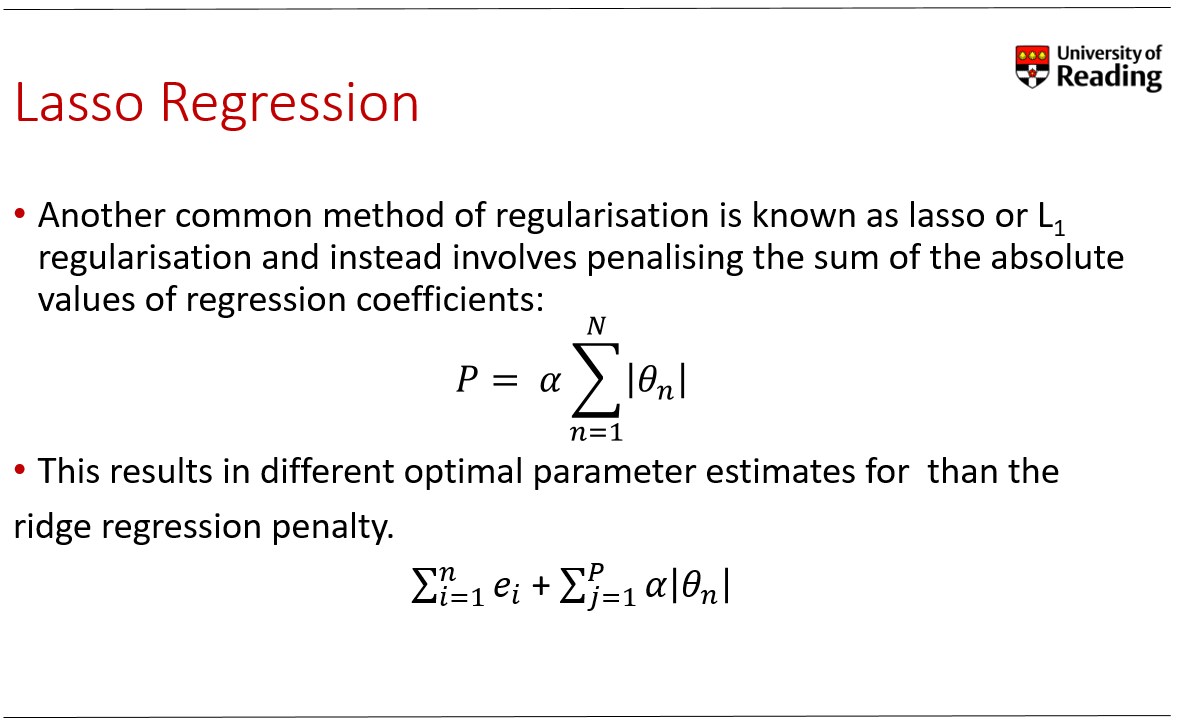

# An example of penalised Lasso regression

In [27]:
#Using the same diabetes dataset
from sklearn.linear_model import Lasso

In [63]:
# 1. Set up the model
lasso = Lasso(alpha=0.1)
# 2. Use fit
lasso.fit(X_train, y_train)
# 3. Check the score
lasso.score(X_test, y_test)

0.6497587169007897

In [64]:
y_pred = lasso.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 25.68
Root Mean squared error: 5.07
Coefficient of determination: 0.65


In [65]:
lasso.coef_

array([-0.70055192,  0.25661452, -0.        ,  0.6885726 , -1.55739022,
        3.24310432, -0.        , -2.26125359,  0.66703856, -0.33847362,
       -1.84590977,  1.02848143, -3.62100991])

In [73]:
def lasso_alpha(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train, y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [74]:
lasso_alpha([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20])

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.3236445999537, tolerance: 3.509685514851485
  positive)


Feature Name  Alpha = 0.000000  Alpha = 0.000100  Alpha = 0.001000  \
0          CRIM         -0.971494         -0.971228         -0.968845   
1            ZN          0.701556          0.701049          0.696498   
2         INDUS          0.276752          0.275844          0.267644   
3          CHAS          0.706532          0.706548          0.706694   
4           NOX         -1.991430         -1.990821         -1.985364   
5            RM          3.115718          3.115783          3.116360   
6           AGE         -0.177060         -0.176831         -0.174767   
7           DIS         -3.045771         -3.045080         -3.038895   
8           RAD          2.282785          2.280938          2.264323   
9           TAX         -1.792604         -1.790754         -1.774082   
10      PTRATIO         -1.979953         -1.979780         -1.978217   
11            B          1.126499          1.126379          1.125303   
12        LSTAT         -3.628149         -3.628120         -3.627845   

    Alpha = 0.010000  Alpha = 1.000000  Alpha = 5.000000  Alpha = 10.000000  \
0          -0.945019         -0.047615         -0.000000               -0.0   
1           0.651064          0.000000          0.000000                0.0   
2           0.186036         -0.000000         -0.000000               -0.0   
3           0.708092          0.051141          0.000000                0.0   
4          -1.930494         -0.000000         -0.000000               -0.0   
5           3.122050          3.065898          0.861183                0.0   
6          -0.153989         -0.000000         -0.000000               -0.0   
7          -2.976730         -0.000000          0.000000                0.0   
8           2.098768         -0.000000         -0.000000               -0.0   
9          -1.608121         -0.000000         -0.000000               -0.0   
10         -1.962598         -1.210801         -0.000000               -0.0   
11          1.114591          0.444365          0.000000                0.0   
12         -3.625330         -3.353957         -1.314498               -0.0   

    Alpha = 20.000000  
0                -0.0  
1                 0.0  
2                -0.0  
3                 0.0  
4                -0.0  
5                 0.0  
6                -0.0  
7                 0.0  
8                -0.0  
9                -0.0  
10               -0.0  
11                0.0  
12               -0.0

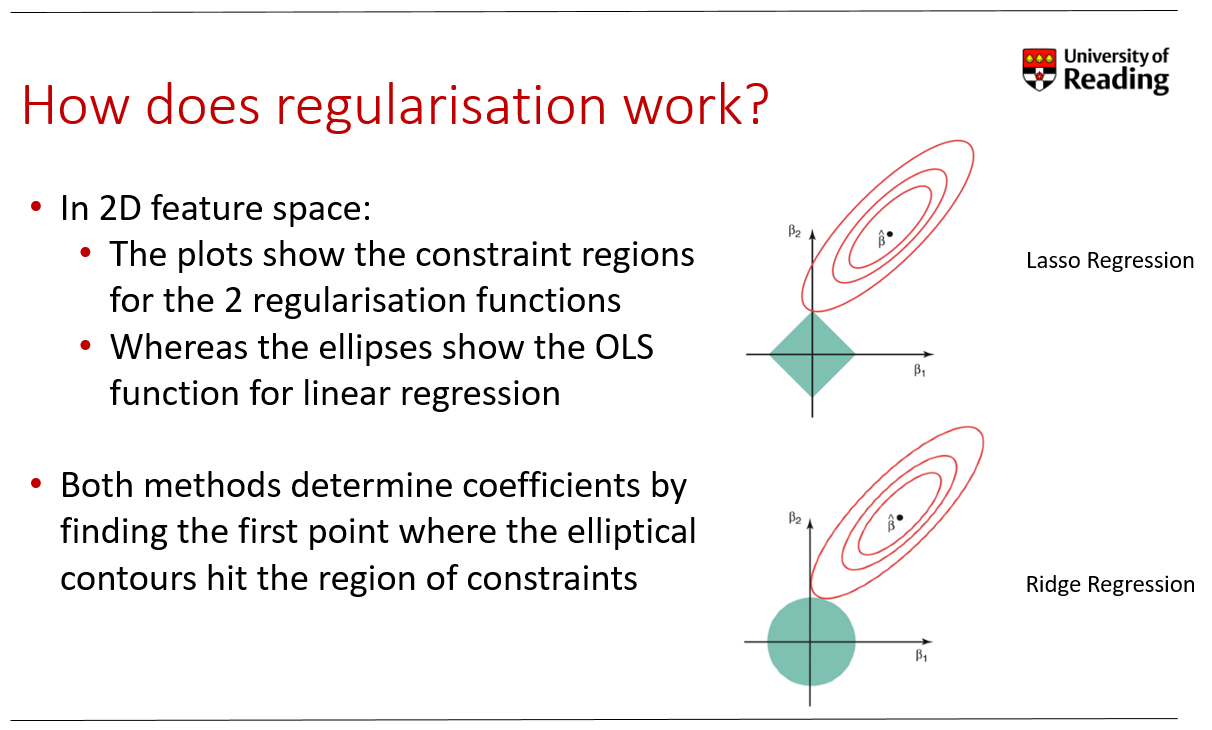

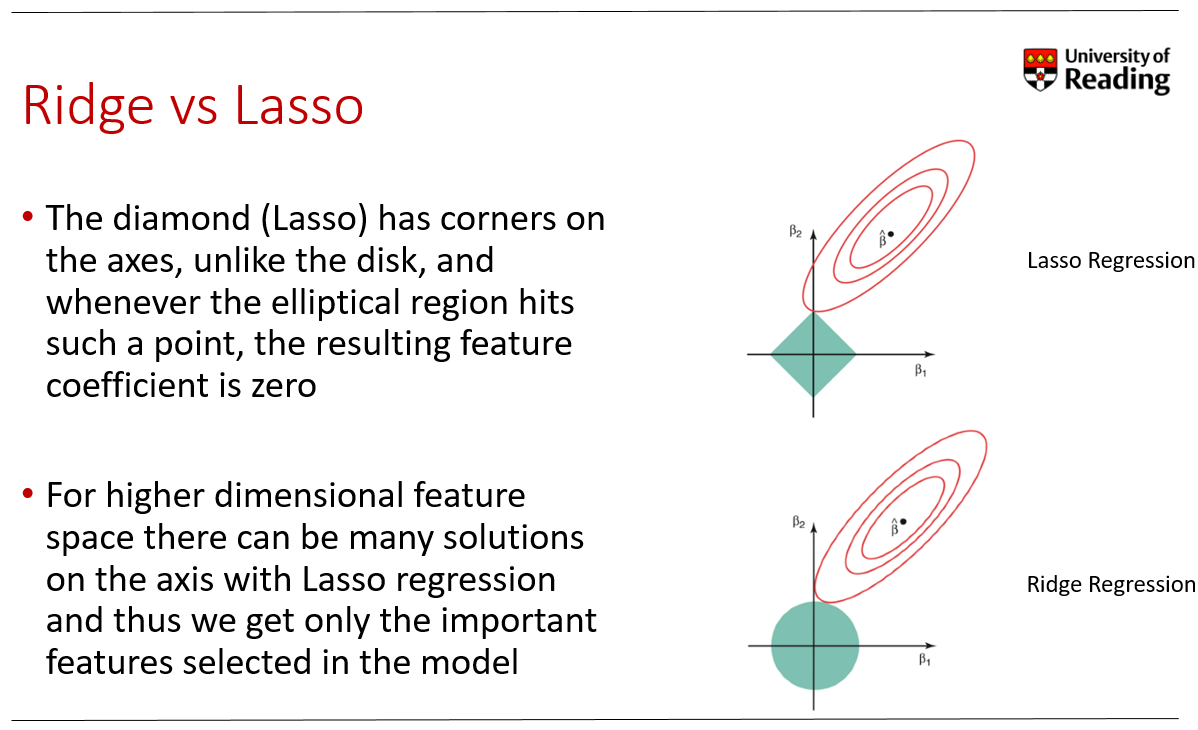

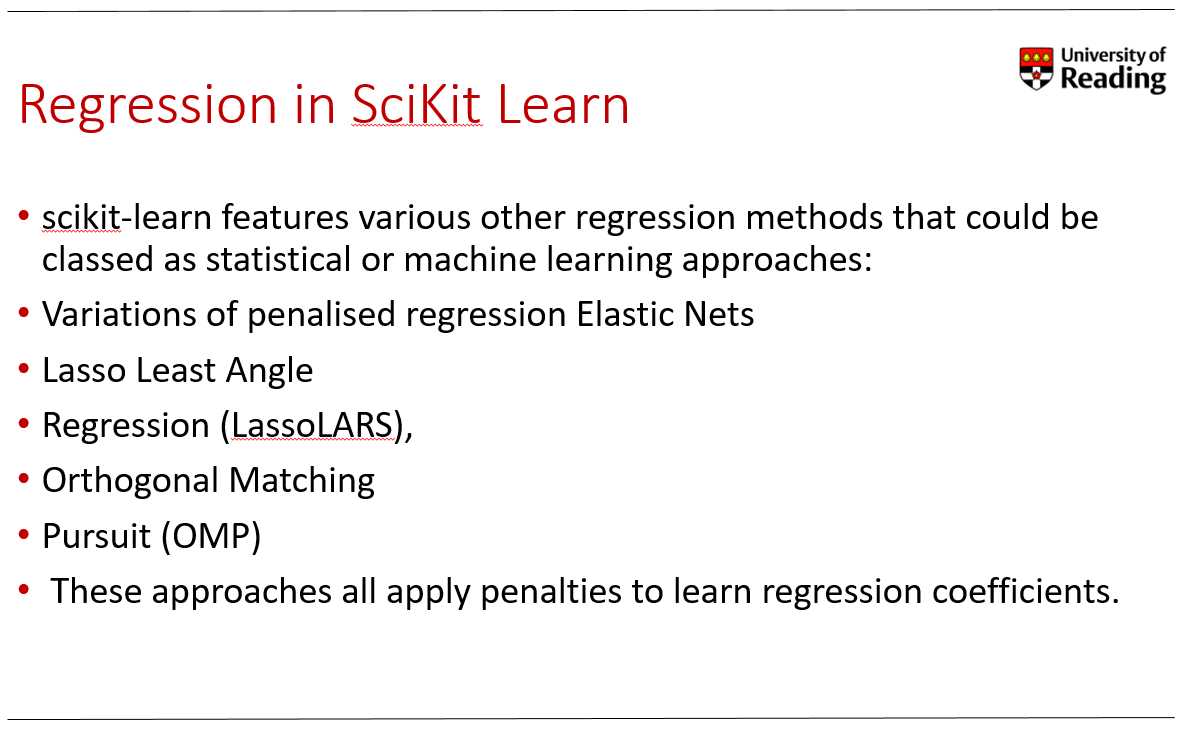

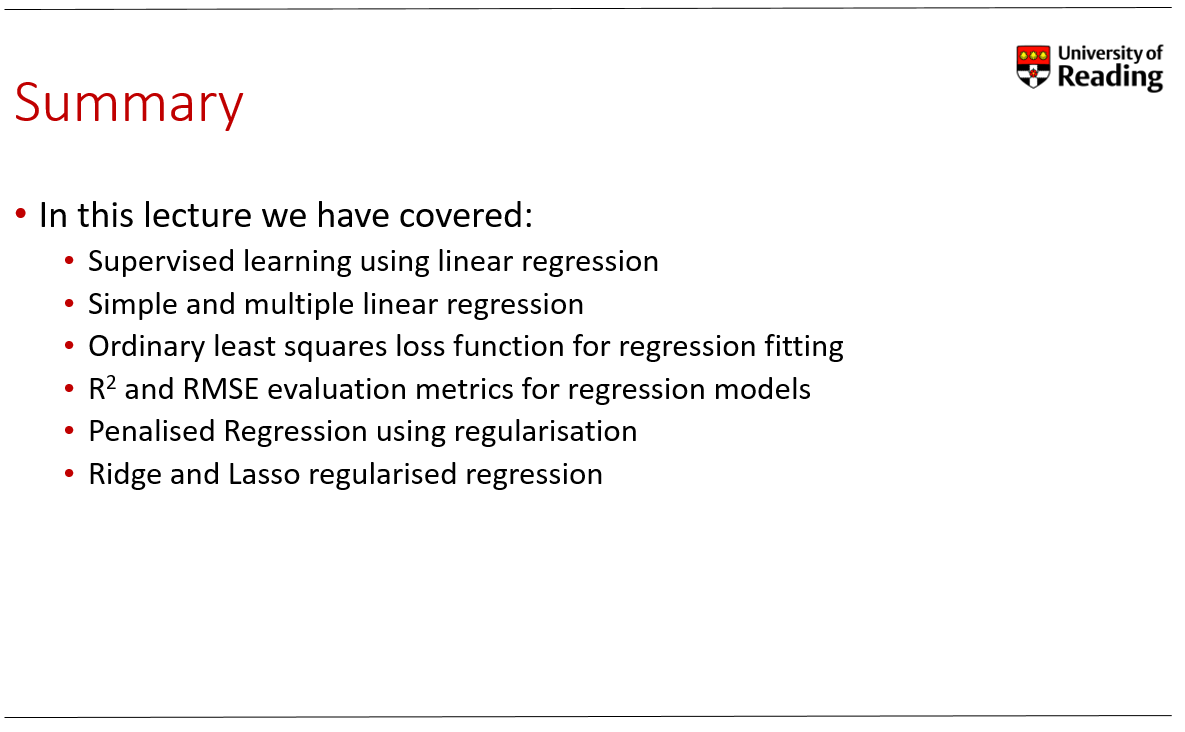